<a href="https://colab.research.google.com/github/hasanahmad676/Deep-Learning-Playlist/blob/main/Artifical_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=1)

In [18]:
x_train.shape

(748, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
xtrain_scaled=scaler.fit_transform(x_train)
xtest_scaled=scaler.transform(x_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model=Sequential()

model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [46]:
history=model.fit(xtrain_scaled,y_train,batch_size=50,verbose=1,validation_split=0.20,epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.7926 - val_loss: 0.4873 - val_accuracy: 0.7533
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.7910 - val_loss: 0.4869 - val_accuracy: 0.7533
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.7943 - val_loss: 0.4880 - val_accuracy: 0.7400
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.7960 - val_loss: 0.4890 - val_accuracy: 0.7467
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.7926 - val_loss: 0.4870 - val_accuracy: 0.7400
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.7910 - val_loss: 0.4877 - val_accuracy: 0.7400
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.7893 - val_loss: 0.4862 - val_accuracy: 0.7533
Epoch 8/100
1

In [47]:
y_pred=model.predict(xtest_scaled)

1/1 [==============================] - 0s 16ms/step


In [48]:
y_pred

array([[0.63243836],
       [0.5014207 ],
       [0.1423497 ],
       [0.18035686],
       [0.10586771],
       [0.17598914],
       [0.64353496],
       [0.04889375],
       [0.2030897 ],
       [0.05345763],
       [0.53111804],
       [0.18357341],
       [0.80630064],
       [0.8161004 ],
       [0.0086588 ],
       [0.7317242 ],
       [0.43348446],
       [0.49488756],
       [0.09389751],
       [0.178264  ]], dtype=float32)

In [49]:
y_pred=y_pred.argmax(axis=1)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8

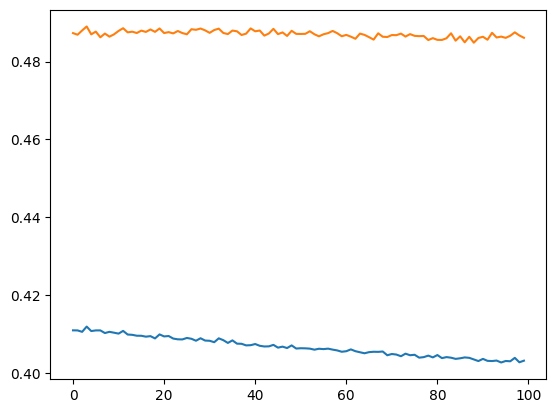

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

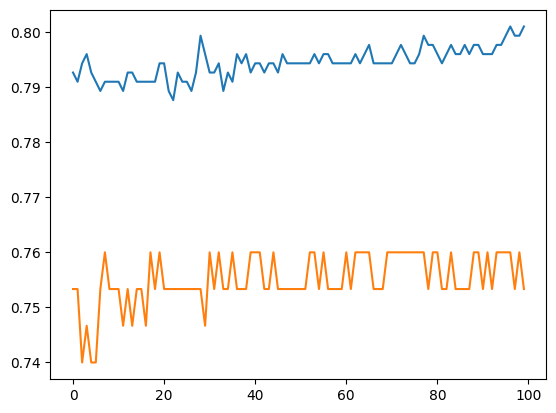

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])